In [1]:
# Verify pytorch is installed correctly
import torch
x = torch.rand(5, 3)
print(x)

tensor([[0.2060, 0.8984, 0.9612],
        [0.9279, 0.3359, 0.2398],
        [0.1190, 0.3355, 0.0644],
        [0.0597, 0.0985, 0.1310],
        [0.5237, 0.1585, 0.9303]])


## Linear regression with Pytorch 
### https://pytorch.org/docs/stable/index.html
### https://towardsdatascience.com/linear-regression-with-pytorch-eb6dedead817
### https://www.geeksforgeeks.org/linear-regression-using-pytorch/

In [1]:
# PyTorch is an optimized tensor library for deep learning using GPUs and CPUs.
# In mathematics, a tensor is an algebraic object that describes a (multilinear) relationship between sets of algebraic objects related to a vector space. 

# Linear Regression is an approach that tries to find a linear relationship 
# between a dependent variable and an independent variable by minimizing the distance

#### 1. Create Data Set, y = 2X +1 

In [ ]:
import numpy as np
# create dummy data for training
x_values = [i for i in range(11)] # zero to 10
x_train = np.array(x_values, dtype=np.float32)
print(x_train)
x_train = x_train.reshape(-1, 1) 
print(x_train)

y_values = [2*i + 1 for i in x_values]
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1, 1)

In [3]:
print(x_values, y_values)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]


In [ ]:
print(x_train, y_train)

#### 2. Define Linear Regression Model inherits PyTorch 

In [8]:
import torch
from torch.autograd import Variable
class linearRegression(torch.nn.Module): # Inherit torch neutral network Module
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__() # Call base class constructor 
        self.linear = torch.nn.Linear(inputSize, outputSize) # Call base class method 

    def forward(self, x):
        out = self.linear(x)
        return out

#### 3. Instantiate the model 

In [40]:
inputDim = 1        # takes variable 'x' 
outputDim = 1       # takes variable 'y'
learningRate = 0.01 
epochs = 100

model = linearRegression(inputDim, outputDim)

##### For GPU #######
if torch.cuda.is_available():
    model.cuda()

#initialize 
#loss (Mean Squared Error)  
#optimization (Stochastic Gradient Descent) functions that we’ll use in the training of this model.
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

#### 4. Train the model 

In [ ]:
for epoch in range(epochs):
    # Converting inputs and labels to Variable
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())
    else:
        inputs = Variable(torch.from_numpy(x_train))
        labels = Variable(torch.from_numpy(y_train))

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    print(loss)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

#### 5. Linear Regression Model is trained, let’s test it

[[ 0.7979808]
 [ 2.8270733]
 [ 4.856166 ]
 [ 6.885258 ]
 [ 8.9143505]
 [10.943443 ]
 [12.972536 ]
 [15.001629 ]
 [17.030722 ]
 [19.059814 ]
 [21.088907 ]]


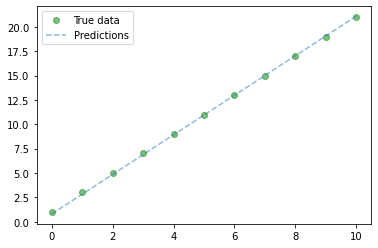

In [20]:
import matplotlib.pyplot as plt
with torch.no_grad(): # we don't need gradients in the testing phase
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
    print(predicted)

plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()